# IIC2613 - Ayudantía 13

En este Colab crearemos nuestra primera red neuronal convolucional (CNN) usando **Keras**, la API de alto nivel de **Tensorflow**! Esta es una guía muy simplificada del proceso, por lo que recomendamos visitar fuentes externas para complementarla.

Para ello primero importaremos libreŕias que serán útiles para la creación de nuestra primera CNN.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

Para nuestra red nueronal convolucional utilizaremos el set de datos CIFAR10, el cual está muy bien documentado y es ampliamente usado para aprender sobre el uso de CNN's en Keras. Este consiste de 60.000 imágenes divididas en 10 clases de manera equitativa. Más detalles los puedes encontrar [aquí.](https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


A continuación normalizaremos los pixeles de la imagen, una práctica común en el análisis de imágenes para deep learning relacionada con la velocidad de convergencia de nuestra red y que consiste dejar todos los valores entre 0 y 1. Si quieres más sobre la normalización puedes leer [aquí](https://lamiae-hana.medium.com/an-intro-to-convolutional-neural-networks-cnn-9f1c2d888fa1) y [aquí.](https://medium.com/sentinel-hub/how-to-normalize-satellite-images-for-deep-learning-d5b668c885af)

In [ ]:
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

Antes de crear nuestra red nueronal, notamos que nuestro dataset tiene labels categóricos (aquellos representados por datos no numéricos), por lo que haremos una codificación [One-hot](https://en.wikipedia.org/wiki/One-hot) que permita represetarlos como vectores binarios con largo igual a la cantidad de clases, en este caso, 10.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

A continuación, crearemos nuestra primera CNN de manera secuecial usando Keras.

In [ ]:
# Aquí creamos un modelo secuencial en Keras. Un modelo secuencial es apropiado para una "pila" simple de capas,
# donde cada capa tiene exactamente un tensor de entrada y uno de salida.
model = models.Sequential()

# Agregamos una capa convolucional 2D, donde:
# - 32: Número de filtros (kernels) en la capa.
# - (3, 3): Tamaño de cada filtro convolucional (3x3).
# - activation='relu': Función de activación 'ReLU' (Rectified Linear Unit).
# - input_shape=(32, 32, 3): Forma esperada de las entradas (imágenes de 32x32 con 3 canales de color, RGB).
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Agregar una capa de Max Pooling.
# - (2, 2): Tamaño del pooling window. Reduce la dimensionalidad espacial.
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar la salida de la capa anterior. Convierte los datos en un vector 1D para alimentar capas densas.
model.add(layers.Flatten())

# Agregar una capa densa (completamente conectada).
# - 64: Número de neuronas en la capa.
# - activation='relu': Función de activación 'ReLU'.
model.add(layers.Dense(64, activation='relu'))

# Agregar otra capa densa. Esta es la capa de salida.
# - 10: Número de neuronas en la capa, que representa la cantidad de clases a predecir.
model.add(layers.Dense(10))


Luego de declarado debemos compilar nuestro modelo, lo que implica establecer y configurar varios aspectos de nuestra CNN. Para saber qué signifca cada unos de estos parámetros (e interiorizarte más profundamente en cómo funciona Keras), recomendamos **fuertemente** visitar la documentación disponible [en este link.](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [ ]:
model.compile(
    optimizer='adam',  # El optimizador 'adam' es uno de los variados optimizadores de Keras utilizado para la actualización de los pesos de la red.
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),  # Define la función de pérdida a utilizar. En este caso, es la entropía cruzada categórica,
                                                                      # adecuada para clasificación multiclase. 'from_logits=True' significa
                                                                      # que la salida del modelo se interpreta como logits (es decir, no ha
                                                                      # pasado por una función de activación softmax).
    metrics=['accuracy']  # Las métricas son utilizadas para monitorear el desempeño del modelo durante el entrenamiento.
                          # 'accuracy' mide la precisión del modelo, es decir, el porcentaje de etiquetas correctamente predichas.
)

# Con el método .fit() realizamos el entrenamiento de nuestro modelo. Para ello solo basta con entregar los dataset de test y validación divididos prevaimente.
# Además definimos la cantidad de 'epochs', que representa la cantidad de iteraciones completas sobre todo el conjunto de datos de entrenamiento.
# Aquí, especificamos que el modelo debe pasar 15 veces por todo el conjunto de entrenamiento durante el entrenamiento.

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))


Epoch 1/15
1563/1563 [==============================] - 19s 6ms/step - loss: 1.4940 - accuracy: 0.4658 - val_loss: 1.2961 - val_accuracy: 0.5429
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2056 - accuracy: 0.5775 - val_loss: 1.2206 - val_accuracy: 0.5753
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0978 - accuracy: 0.6192 - val_loss: 1.2059 - val_accuracy: 0.5761
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0263 - accuracy: 0.6426 - val_loss: 1.1854 - val_accuracy: 0.5928
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9664 - accuracy: 0.6626 - val_loss: 1.1106 - val_accuracy: 0.6182
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9127 - accuracy: 0.6829 - val_loss: 1.0790 - val_accuracy: 0.6279
Epoch 7/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8655 - accuracy: 0.6973 - val_loss: 1.0986 - val_accur

**TIP:** Podemos guardar nuestra red en Keras, lo que incluye arquitectura, pesos, configuración y estado del compilador. Por default, este modelo es almacenado en un archivo tipo HDF5 (.h5). Más información en el siguiente [enlace.](https://www.tensorflow.org/api_docs/python/tf/keras/saving/save_model)

In [ ]:
model.save("model")

Cargamos nuevamente el mismi modelo.

In [ ]:
from tensorflow.keras import models
reloaded_model = models.load_model('model')

Definiremos una función para poder evaluar este modelo e imprimir loss resultados. Esta función fue sacada del siguiente [enlace](https://learnopencv.com/Implementing-cnn-tensorflow-keras/), el cual es un excelente tutorial que podría serles de ayuda en la tarea (guiño guiño).

In [ ]:
# Fuente: https://learnopencv.com/Implementing-cnn-tensorflow-keras/

import numpy as np

def evaluate_model(dataset, model):

    class_names = ['airplane',
                   'automobile',
                   'bird',
                   'cat',
                   'deer',
                   'dog',
                   'frog',
                   'horse',
                   'ship',
                   'truck' ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:num_rows*num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')

        acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)

    return

Finalmente evalualmos el modelo descargado y visualizamos los resultados:

1/1 [==============================] - 0s 109ms/step
Prediction accuracy:  0.72


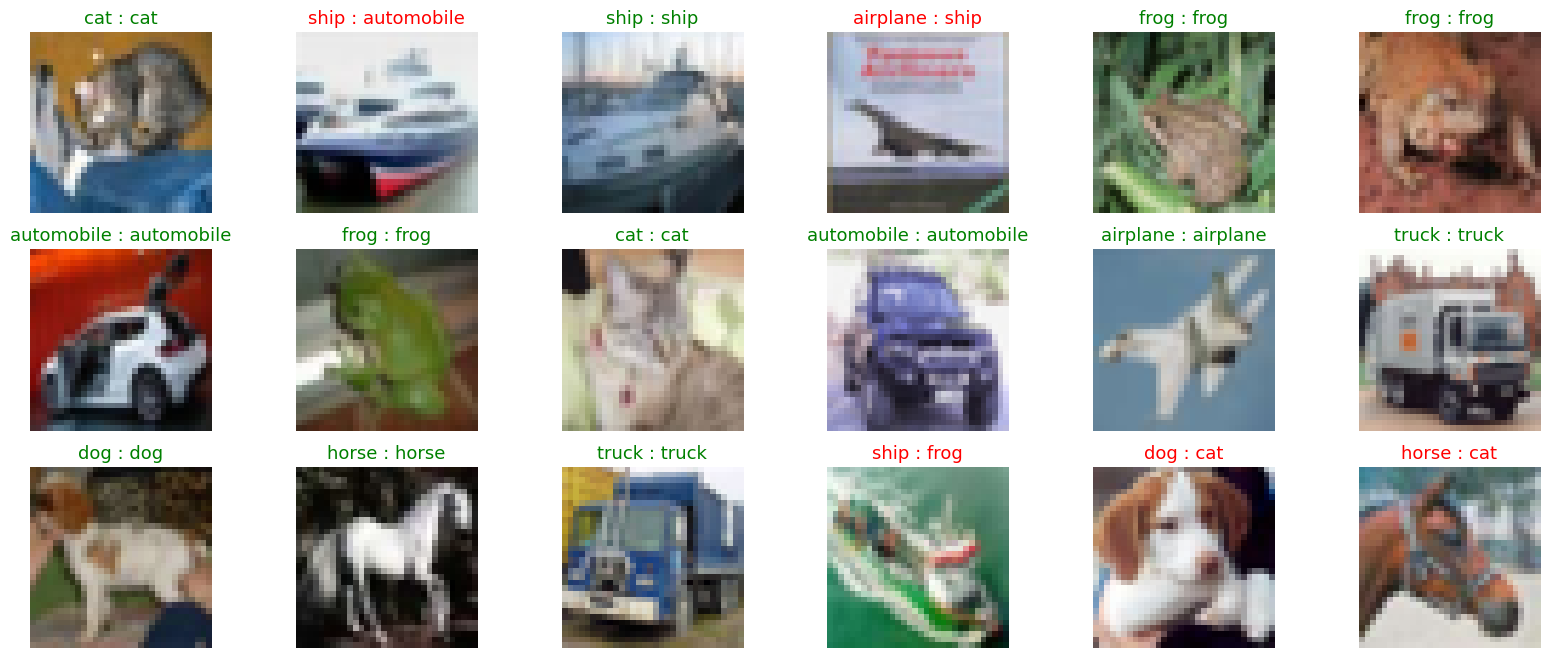

In [ ]:
evaluate_model(X_test, reloaded_model)

**¿Qué pasaría si aumentamos la cantidad de capas?** Probemos creando un nuevo modelo:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 14s 7ms/step - loss: 1.5470 - accuracy: 0.4260 - val_loss: 1.2371 - val_accuracy: 0.5518
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1586 - accuracy: 0.5855 - val_loss: 1.0625 - val_accuracy: 0.6238
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9854 - accuracy: 0.6529 - val_loss: 1.0416 - val_accuracy: 0.6395
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8794 - accuracy: 0.6898 - val_loss: 0.8988 - val_accuracy: 0.6879
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8070 - accuracy: 0.7170 - val_loss: 0.9520 - val_accuracy: 0.6691
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7459 - accuracy: 0.7396 - val_loss: 0.9125 - val_accuracy: 0.6891
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7033 - accuracy: 0.7516 - val_loss: 0.8687 - val_ac

Evaluamos el nuevo modelo:

1/1 [==============================] - 0s 135ms/step
Prediction accuracy:  0.88


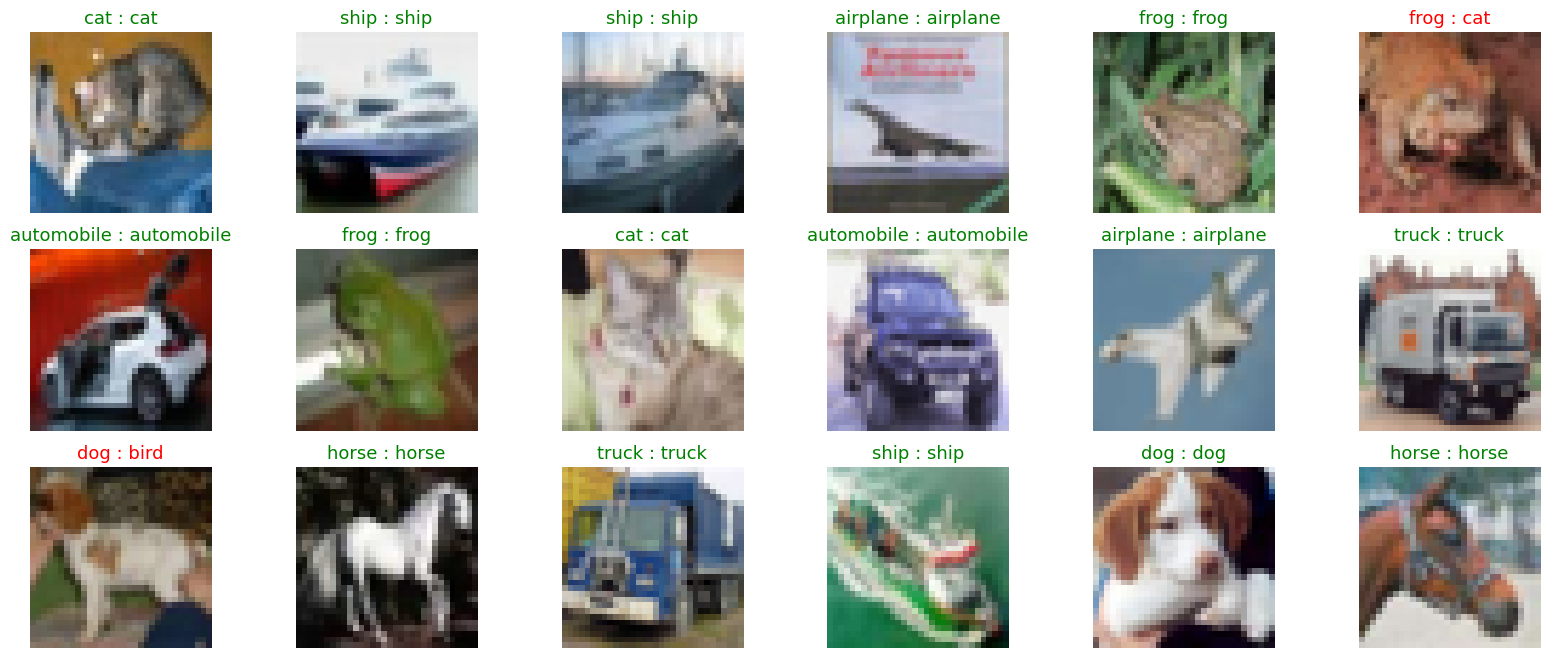

In [ ]:
evaluate_model(X_test, model)

Vemos como mejora el accuracy en cada clase :o. ¿Qué pasará si damos más epochs? ¿O si cambiamos la arquitectura?
